In [1]:
import defense
import eot_defense
import numpy as np
import PIL
import matplotlib.pyplot as plt
def load_image(path):
    return (np.asarray(PIL.Image.open(path).resize((299, 299)))/255.0).astype(np.float32)

/home/eason/anaconda3/envs/untitled/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/eason/anaconda3/envs/untitled/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/eason/anaconda3/envs/untitled/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/eason/anaconda3/envs/untitled/lib/pyt

In [6]:
def _maybe_process_in_chunks(process_fn, **kwargs):
    """
    Wrap OpenCV function to enable processing images with more than 4 channels.

    Limitations:
        This wrapper requires image to be the first argument and rest must be sent via named arguments.

    Args:
        process_fn: Transform function (e.g cv2.resize).
        kwargs: Additional parameters.

    Returns:
        numpy.ndarray: Transformed image.

    """

    def __process_fn(img):
        num_channels = get_num_channels(img)
        if num_channels > 4:
            chunks = []
            for index in range(0, num_channels, 4):
                chunk = img[:, :, index : index + 4]
                chunk = process_fn(chunk, **kwargs)
                chunks.append(chunk)
            img = np.dstack(chunks)
        else:
            img = process_fn(img, **kwargs)
        return img

    return __process_fn

def get_num_channels(image):
    return image.shape[2] if len(image.shape) == 3 else 1

In [9]:
img=orig
import cv2
import random

In [141]:
blur_limit = (3,9)

# randod.choice(np.arange(blur_limit[0], blur_limit[1] + 1, 2))
ksize = 3
kernel = np.zeros((ksize, ksize), dtype=np.uint8)
xs, xe = random.randint(0, ksize - 1), random.randint(0, ksize - 1)
if xs == xe:
    ys, ye = random.sample(range(ksize), 2)
else:
    ys, ye = random.randint(0, ksize - 1), random.randint(0, ksize - 1)

In [142]:
cv2.line(kernel, (xs, ys), (xe, ye), 1, thickness=1)

array([[1, 1, 0],
       [0, 0, 1],
       [0, 0, 0]], dtype=uint8)

In [143]:
kernel = kernel.astype(np.float32) / np.sum(kernel)
print(kernel)

[[0.33333334 0.33333334 0.        ]
 [0.         0.         0.33333334]
 [0.         0.         0.        ]]


In [144]:
blur_fn = _maybe_process_in_chunks(cv2.filter2D, ddepth=-1, kernel=kernel)

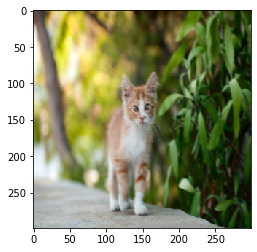

In [145]:
plt.imshow(blur_fn(img))

In [3]:
orig = load_image('cat.jpg')

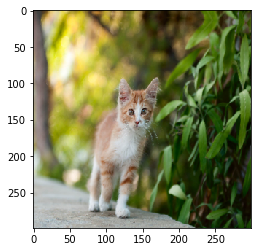

In [23]:
plt.imshow(img)

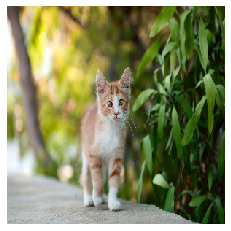

In [4]:
plt.axis('off')
plt.imshow(orig)

/home/eason/anaconda3/envs/untitled/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


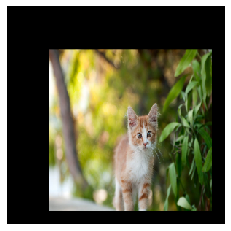

In [4]:
plt.axis('off')
plt.imshow(defense.defend_PROTAT(orig))

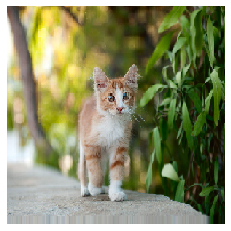

In [95]:
plt.axis('off')
plt.imshow(defense.defend_RDG(orig))

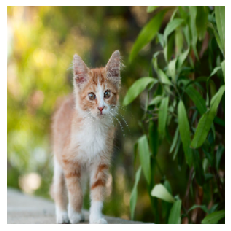

In [96]:
plt.axis('off')
plt.imshow(defense.defend_CROP(orig))

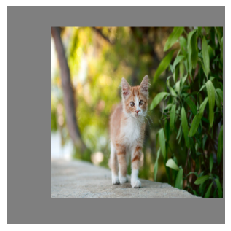

In [101]:
plt.axis('off')
plt.imshow(defense.defend_RAND(orig))

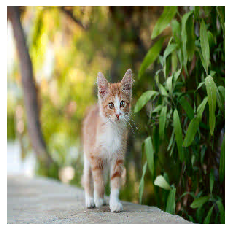

In [102]:
plt.axis('off')
plt.imshow(defense.defend_FD(orig))

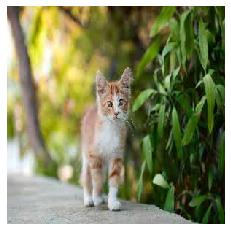

In [103]:
plt.axis('off')
plt.imshow(defense.defend_SHIELD(orig))

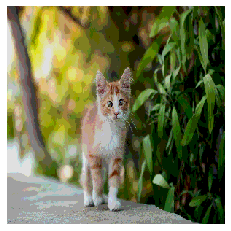

In [104]:
plt.axis('off')
plt.imshow(defense.defend_BdR(orig))

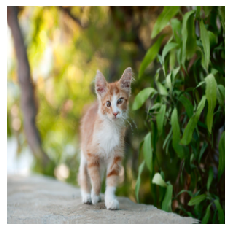

In [105]:
plt.axis('off')
plt.imshow(defense.defend_ET(orig))

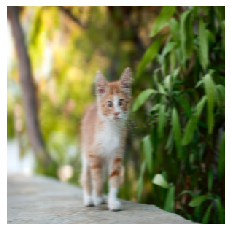

In [106]:
plt.axis('off')
plt.imshow(defense.defend_MB(orig))

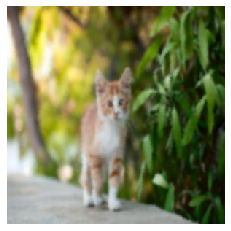

In [147]:
plt.axis('off')
plt.imshow(defense.defend_GB(orig))

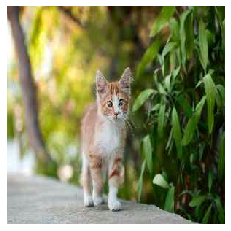

In [108]:
plt.axis('off')
plt.imshow(defense.defend_JPEG(orig))

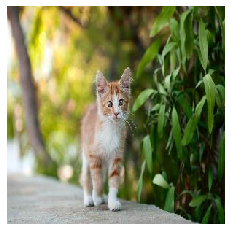

In [5]:
plt.axis('off')
plt.imshow(defense.defend_WebP(orig))

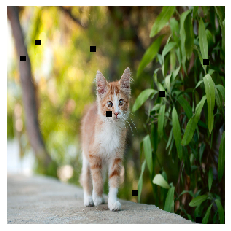

In [126]:
plt.axis('off')
plt.imshow(defense.defend_CD(orig))

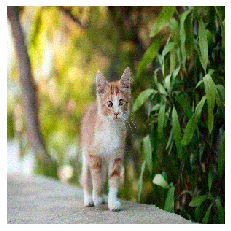

In [127]:
plt.axis('off')
plt.imshow(defense.defend_GN(orig))

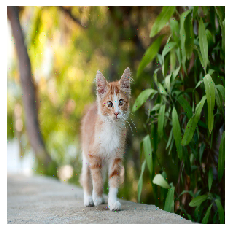

In [128]:
plt.axis('off')
plt.imshow(defense.defend_PD(orig))